In [185]:
# Importing libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
#Reading files
Train_Data = pd.read_csv('Train_Data.csv').values
Train_Labels = pd.read_csv('Train_Labels.csv').values
Test_Data = pd.read_csv('Test_Data.csv').values
Test_Labels = pd.read_csv('Test_Labels.csv').values
row, col = Train_Data.shape

#Number of folds
num_fold = 5

#Number of data in each fold
n = 2000

#Appending data to Train_Data to make it multiple of num_data
Train_Data = np.append(Train_Data, Train_Data[0][:].reshape((1, col)), axis = 0)
Train_Labels = np.append(Train_Labels, Train_Labels[0].reshape((1, 1)), axis = 0)

#Reshaping train data
Train_Data = Train_Data.reshape((num_fold, n, col, 1))
Train_Labels = Train_Labels.reshape((num_fold, n, 1))

In [199]:
#Creating Labels for each class
num_of_classes = 10
Labels = np.zeros((num_of_classes, num_fold, n, 1))
for i in range(num_of_classes):
    for j in range(num_fold):
        for k in range(n):
            if Train_Labels[j][k][0] == i:
                Labels[i][j][k][0] = 1
            else:
                Labels[i][j][k][0] = -1

In [200]:
def SGD(Train_Data, Labels, landa, alpha):
    num_of_classes, num_fold, _, _ = Labels.shape
    _, n, col, _ = Train_Data.shape
    W = np.random.normal(0, np.math.sqrt(0.1), (num_of_classes, num_fold, col, 1))
    B = np.random.normal(0, np.math.sqrt(0.1), (num_of_classes, num_fold))
    #B = np.zeros((num_of_classes, num_fold))
    epochs = 20
    G = np.zeros((num_of_classes, num_fold, epochs + 1))
    ACC = np.zeros((num_of_classes, num_fold, epochs + 1))
    epoch_num = np.ones((num_of_classes, num_fold))
    N = (num_fold - 1)*n
    index = np.arange(n)
    
    #Calculating loss and acc for before training
    for i in range(num_of_classes):
        for fold in range(num_fold):
            w = W[i][fold][:][:]
            b = B[i][fold]
            g = landa*np.dot(np.transpose(w), w)
            acc = 0
            for j in range(num_fold):
                if j == fold:
                    pass
                else:
                    for t in range(n):
                        x = Train_Data[j][t][:][:]
                        L = Labels[i][j][t][:]
                        wx = np.dot(np.transpose(w), x)
                        A = L*(wx - b)
                        g += (1/N)*max(0, 1-A)
                        if A > 0:
                            acc += 1
            ACC[i][fold][0] = (acc/N)*100
            G[i][fold][0] = g
                
                        
    #Training and calculating loss and acc on train data with k fold cross validation    
    for num_class in range(num_of_classes):
        for fold in range(num_fold):
            w = W[num_class][fold][:][:]
            b = B[num_class][fold]
            epoch = 0
            accuracy = 0
            while(epoch < epochs and accuracy < 98):
                acc = 0
                for i in range(num_fold):
                    if i == fold:
                        pass
                    else:
                        for j in range(n):
                            #loss = 0
                            x = Train_Data[i][j][:][:]
                            L = Labels[num_class][i][j][:]
                            wx = np.dot(np.transpose(w), x)
                            A = L*(wx - b)
                            if A < 1:
                                w += alpha*((-2*landa)*w + L*x)
                                b +=  -L
                            else:
                                w += alpha*(-2*landa*w)
                g = landa*(np.dot(np.transpose(w), w))
                for s in range(num_fold):
                    if s == fold:
                        pass
                    else:
                        for d in range(n):
                            pred = np.dot(np.transpose(w), Train_Data[s][d][:][:])-b
                            l = Labels[num_class][s][d]
                            g += (1/N)*max(0, 1-l*(pred))
                            if pred*l > 0:
                                acc += 1
                G[num_class][fold][epoch + 1] = g
                ACC[num_class][fold][epoch + 1] = (acc/N)*100
                accuracy = ACC[num_class][fold][epoch + 1]
                epoch += 1
            epoch_num[num_class][fold] += epoch
            W[num_class][fold][:][:] = w
            B[num_class][fold] = b
    return G, ACC, epoch_num, W, B

In [225]:
landa = 1e-2
alpha = 1e-4
G, ACC, epoch_num, W1, B = SGD(Train_Data, Labels, landa, alpha)

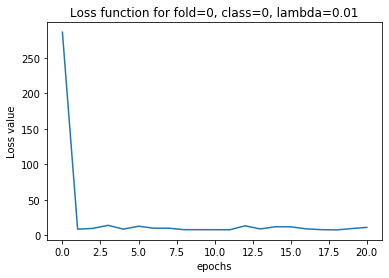

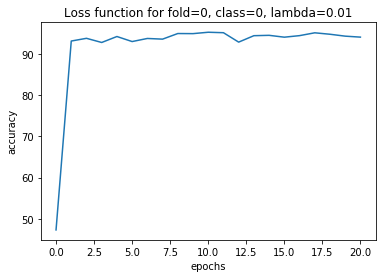

accuracy for 


In [234]:
cl = 0
fol = 0

# plot of loss function
plt.plot(G[cl][fol][0:int(epoch_num[cl][fol])])
plt.title(f"Loss function for fold={fol}, class={cl}, lambda={landa}")
plt.xlabel("epochs")
plt.ylabel("Loss value")
plt.show()

# plot of accuracy
plt.plot(ACC[cl][fol][0:int(epoch_num[cl][fol])])
plt.title(f"Loss function for fold={fol}, class={cl}, lambda={landa}")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

print("accuracy for ")

In [207]:
def Testing_Folds(W, B, Train_Data, Train_Labels, landa):
    num_of_classes, num_fold, col, _ = W.shape
    _, n, _, _ = Train_Data.shape
    test_acc = np.zeros((num_fold, 1))
    A = np.zeros((num_of_classes, 1))
    for fold in range(num_fold):
        for i in range(n):
            for num_class in range(num_of_classes):
                w = W[num_class][fold][:][:]
                ww = np.math.sqrt(np.dot(np.transpose(w), w))
                A[num_class][:] = (np.dot(np.transpose(w), Train_Data[fold][i][:][:])-B[num_class][fold])/ww
            pred = np.argmax(A)
            if Train_Labels[fold][i][:] == pred:
                test_acc[fold][:] += 1
    test_acc *= (100/n)
    return test_acc
                

In [226]:
test_acc = Testing_Folds(W1, B, Train_Data, Train_Labels, landa)
print(f"accuracy for lambda={landa} by performing W to folds are:\n{test_acc}")
print(f"Mean of accuracy for lambda={landa} by performing W to folds are:\n{np.mean(test_acc)}")

accuracy for lambda=0.01 by performing W to folds are:
[[76.3 ]
 [79.3 ]
 [76.9 ]
 [77.55]
 [78.95]]
Mean of accuracy for lambda=0.01 by performing W to folds are:
77.80000000000001


In [227]:
Test_Data = pd.read_csv('Test_Data.csv').values
Test_Labels = pd.read_csv('Test_Labels.csv').values
num_test, col = Test_Data.shape
Test_Data = Test_Data.reshape((num_test, col, 1))
Train = pd.read_csv('Train_Data.csv').values
Train_L = pd.read_csv('Train_Labels.csv').values
M, col = Train.shape
Train = Train.reshape((M, col, 1))
TL = np.zeros((num_of_classes, M, 1))
for i in range(num_of_classes):
    for j in range(M):
        if Train_L[j][0] == i:
            TL[i][j] = 1
        else:
            TL[i][j] = -1

In [229]:
Test_L = np.zeros((num_of_classes, num_test, 1))
for i in range(num_of_classes):
    for j in range(num_test):
        if Test_Labels[j][0] == i:
            Test_L[i][j] = 1
        else:
            Test_L[i][j] = -1

In [230]:
def Testing_Test_Data(Train, TL, Test_Data, Test_L, Test_Labels, alpha, landa):
    num_test, col, _ = Test_Data.shape
    num_of_classes, M, _ = TL.shape
    W = np.random.normal(0, np.math.sqrt(0.1), (num_of_classes, col, 1))
    B = np.random.normal(0, np.math.sqrt(0.1), (num_of_classes, 1))
    epochs = 20
    G_Train = np.zeros((num_of_classes, epochs + 1))
    ACC_Train = np.zeros((num_of_classes, epochs + 1))
    num_epoch = np.zeros(num_of_classes)
    run = True
    shuff = np.arange(M)
    L_shuff = np.zeros((M, 1))
    X_shuff = np.zeros((M, col, 1))
    desired_acc = 92
    
    for num_class in range(num_of_classes):
        w = W[num_class][:][:]
        b = B[num_class][:]
        epoch = 0
        while(True):
            g = landa*np.dot(np.transpose(w), w)
            acc = 0
            for t in range(M):
                x = Train[t][:][:]
                wx = np.dot(np.transpose(w), x)
                L = TL[num_class][t][:]
                A = L*(wx - b)
                g += (1/M)*(max(0, 1 - A))
                if A > 0:
                    acc += 1
            ACC_Train[num_class][epoch] = (acc/M)*100
            accuracy = ACC_Train[num_class][epoch]
            G_Train[num_class][epoch] = g
            epoch += 1
            run = (epoch < (epochs+1)) and (accuracy < desired_acc)
            if run:
                np.random.shuffle(shuff)
                X_shuff = Train[shuff][:][:]
                L_shuff = TL[num_class][shuff][:]
                for i in range(M):
                    x = X_shuff[i][:][:]
                    L = L_shuff[i][:]
                    wx = np.dot(np.transpose(w), x)
                    A = L*(wx - b)
                    if A < 1:
                        w += alpha*((-2*landa)*w + L*x)
                        b = b - L
                    else:
                        w += alpha*((-2*landa)*w)
            else:
                break
        W[num_class][:][:] = w
        B[num_class][:] = b
        num_epoch[num_class] = epoch + 1
    
    vec = np.zeros((num_of_classes, 1))
    pred = np.zeros((num_test, 1))
    #Testing test data
    acc = 0
    for i in range(num_test):
        x = Test_Data[i][:][:]
        for num_class in range(num_of_classes):
            w = W[num_class][:][:]
            b = B[num_class][:]
            wx = np.dot(np.transpose(w), x)
            ww = np.math.sqrt(np.dot(np.transpose(w), w))
            vec[num_class][:] = (wx - b)/ww
        pred[i][:] = np.argmax(vec)
        if int(pred[i][:]) == int(Test_Labels[i][:]):
            acc += 1
    ACC_Test = (acc/num_test)*100
    return W, B, num_epoch, G_Train, ACC_Train, ACC_Test, pred, vec

In [231]:
W, B, num_epoch, G_Train, ACC_Train, ACC_Test, pred, vec = Testing_Test_Data(Train, TL, Test_Data, Test_L, Test_Labels, alpha, landa)

accuracy = 76.13603886824806


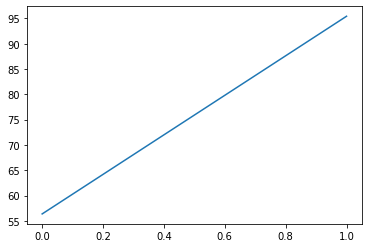

In [233]:
cl = 4
plt.plot(ACC_Train[cl-1][0:int(num_epoch[cl-1]-1)])
print(f"accuracy = {ACC_Test}")